### Linear Regression intro and details

- Linear regression examines the linear relationship between two (Simple Linear Regression ) or more (Multiple Linear Regression) variables — a dependent variable and independent variable(s)

-  Linear relationship basically means that when one (or more) independent variables increases (or decreases), the dependent variable increases (or decreases) too

- A relationship between variables Y and X is represented by this equation:

        Y = mX + b
        
- Y = Dependent variable — or the variable we are trying to predict or estimate
- X = Independnt vriable — the variable we are using to make predictions

- m is the slope of the regression line. It rpresent the effect X has on Y. If X increases by 1 unit, Y will increase by         exactly m units

- b is a constant, also known as the Y-intercept. If X equals 0, Y would be equal to b

- Coeff of regression, has direct effect on the value of Target variable

- Greater the value of a1 (y= a1x + c), higher the intensity of that coeff on y.

- model determines the value of a1 and c using OLS

- Ordinary least squares (OLS): Minimize sum of squares of residuals




### Simple Linear Reg 

- In SLR, the slope and Y-intercept derive from the data; 
- we don’t need the relationship between X and Y to be exactly linear. 
- SLR models also include the errors in the data (also known as residuals)
- Residuals =basically the differences between the true value of Y and the predicted/estimated value of Y

- Moto : Find "line of best fit" — the regression line where the errors would be minimal

- Goal : to minimize the mean squared error (MSE) or the sum of squares of error (SSE), also called the “residual sum of squares.” (RSS)


### Multiple Linear Reg

- In most cases, we will have more than one independent variable — we’ll have multiple variables

- it can be as little as two independent variables and up to hundreds (or theoretically even thousands) of variables. in those cases we will use a Multiple Linear Regression model (MLR). 

- The regression equation is pretty much the same as the simple regression equation, just with more variables:

  Y = b0 + b1X1 + b2X2

### Regularization

- Linear regression minimizes a loss function 
- It chooses a coeﬃcient for each feature variable 
- Large coeﬃcients can lead to overﬁtting and expensive model
- Penalizing large coeﬃcients: Regularization


### Ridge Regression

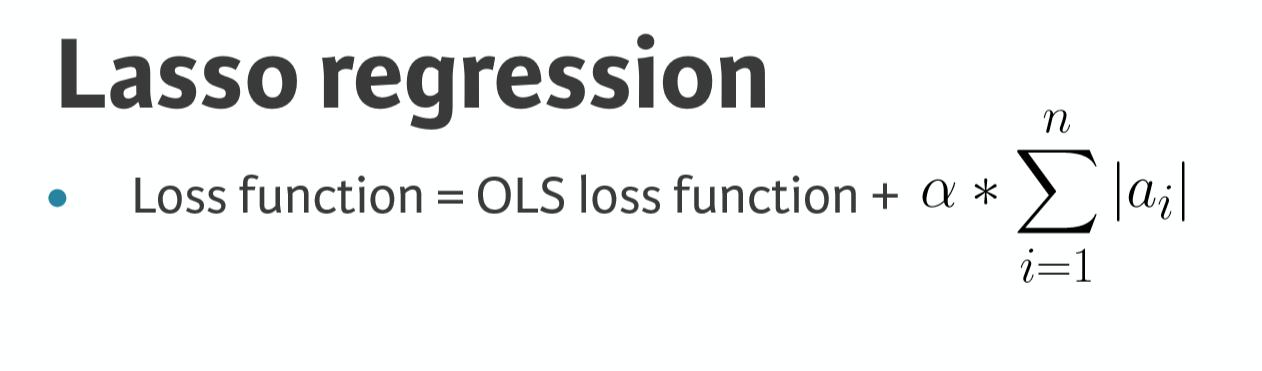


- Alpha: Parameter we need to choose  
- Picking alpha here is similar to picking k in k-NN 
- Hyperparameter tuning 
- Alpha controls model complexity 
- Alpha = 0: get back OLS (Can lead to overﬁ"ing) ● Very high alpha: Can lead to underﬁ"ing

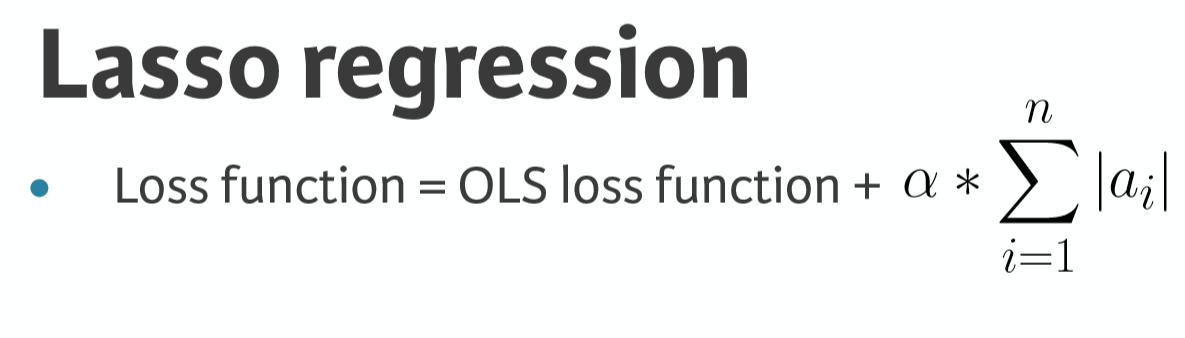

- Can be used to select important features of a dataset 
-  Shrinks the coeﬃcients of less important features to exactly 0

Gridsearch and Gradient Descent :
    
- Grid search is not used for tuning the parameters (only the hyperparameters), which are tuned with with gradient descend.

- Grid Search = Hyperparameter tuning
- Gradient Descent = Parameter tuning

- A parameter is something that changes during training; in a neural network, the only parameters are the weights and the biases, and they are tuned with gradient descend.

- A hyperparameter can be thought as something "structural", e.g. the number of layers, the number of nodes for each layer.



### Feature selection and modelling : 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [2]:
df = pd.read_csv("vgsales.csv")

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:

cat_vars = df.describe(include=["object"]).columns
cont_vars = df.describe().columns

C:\Users\jharu\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jharu\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jharu\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\jharu\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000212D333A8D0>,
      dtype=object)

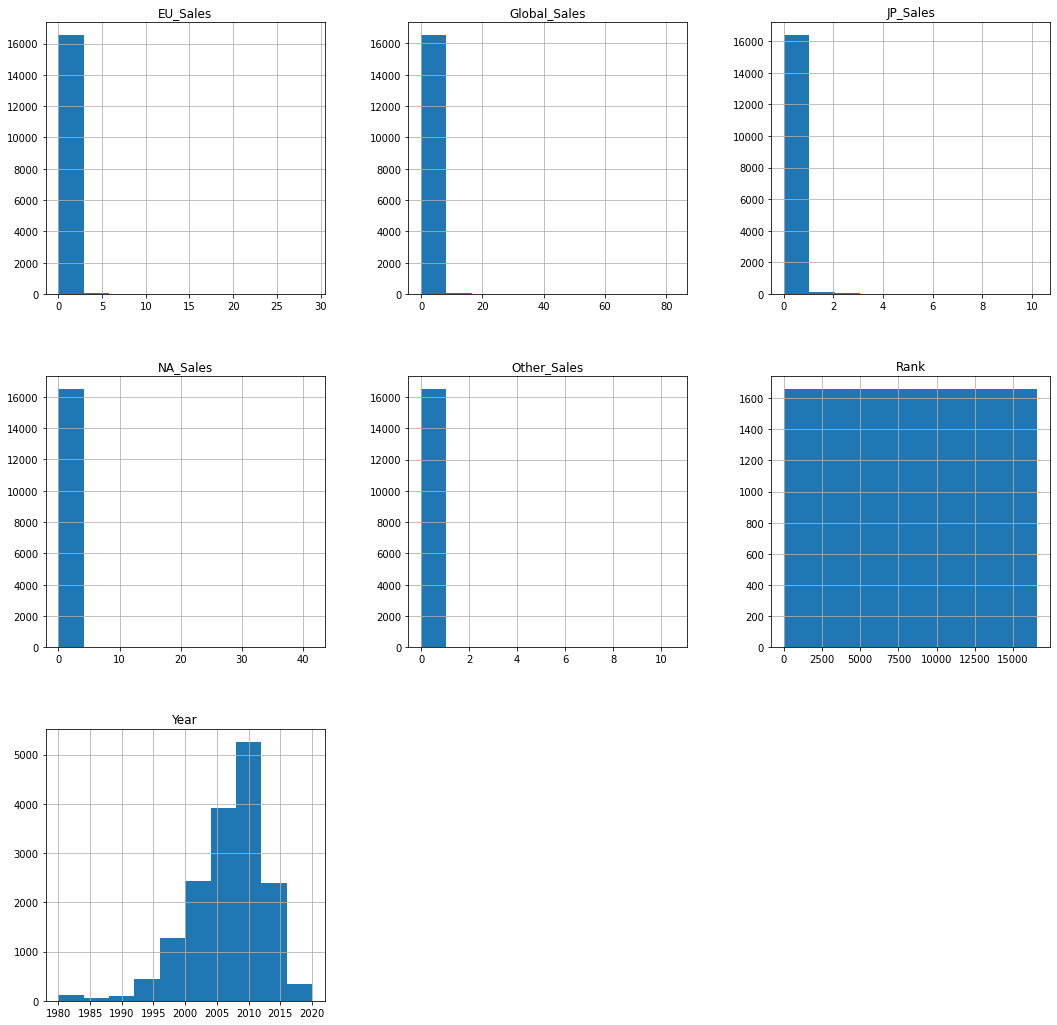

In [5]:
df.hist(column=cont_vars, figsize = (18,18))

In [6]:
print(cat_vars)

Index(['Name', 'Platform', 'Genre', 'Publisher'], dtype='object')


In [7]:
"""
fig, axes = plt.subplots(4, 3, figsize=(18, 18))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    if i > 3:
        ax.set_visible(False)
        continue
    sns.countplot(y = cat_vars[i], data=df, ax=ax)
"""

'\nfig, axes = plt.subplots(4, 3, figsize=(18, 18))\nplt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)\n\nfor i, ax in enumerate(axes.ravel()):\n    if i > 3:\n        ax.set_visible(False)\n        continue\n    sns.countplot(y = cat_vars[i], data=df, ax=ax)\n'

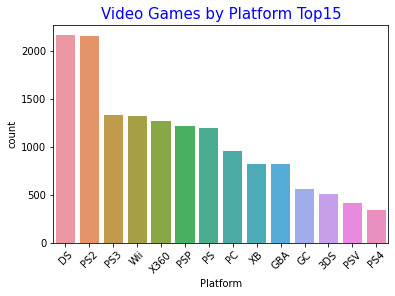

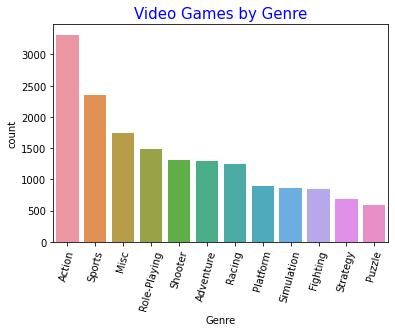

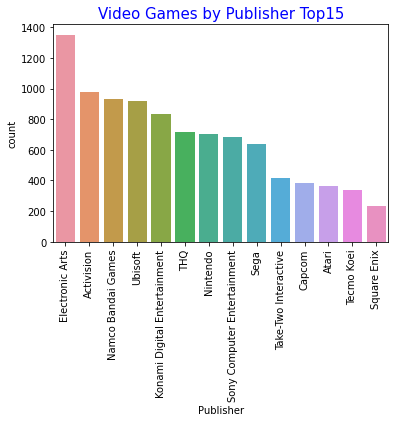

In [8]:
plt.subplots(1,1)
sns.countplot(df.Platform, order=df.Platform.value_counts().iloc[:14].index)
plt.xticks(rotation= 45)
plt.title("Video Games by Platform Top15",color = 'blue',fontsize=15)
plt.show()

plt.subplots(1,1)
sns.countplot(df.Genre, order=df.Genre.value_counts().index)
plt.title("Video Games by Genre",color = 'blue',fontsize=15)
plt.xticks(rotation= 75)
plt.show()

plt.subplots(1,1)
sns.countplot(df.Publisher, order=df.Publisher.value_counts().iloc[0:14].index)
plt.title("Video Games by Publisher Top15",color = 'blue',fontsize=15)
plt.xticks(rotation= 90)
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# label encoding of categorical variables
lbe = LabelEncoder()
df['Genre_Cat'] = lbe.fit_transform(df['Genre'])
df['Platform_Cat'] = lbe.fit_transform(df['Platform'])
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Cat,Platform_Cat
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,10,26
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4,11
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,6,26
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,10,26
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,7,5


In [11]:
df['Global_Sales'] = df['Global_Sales'].astype(int)

In [12]:
df =df.drop(['Rank', 'Name', 'Year','Publisher','Genre','Platform'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 7 columns):
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null int32
Genre_Cat       16598 non-null int32
Platform_Cat    16598 non-null int32
dtypes: float64(4), int32(3)
memory usage: 713.3 KB


In [13]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Cat,Platform_Cat
NA_Sales,1,0.767727,0.449787,0.634737,0.930165,0.0174354,0.0415358
EU_Sales,0.767727,1,0.435584,0.726385,0.892081,0.0164806,0.047158
JP_Sales,0.449787,0.435584,1,0.290186,0.606423,0.0300848,-0.0782067
Other_Sales,0.634737,0.726385,0.290186,1,0.735865,0.00973062,0.0550605
Global_Sales,0.930165,0.892081,0.606423,0.735865,1,0.0150909,0.0172581
Genre_Cat,0.0174354,0.0164806,0.0300848,0.00973062,0.0150909,1,0.0290611
Platform_Cat,0.0415358,0.047158,-0.0782067,0.0550605,0.0172581,0.0290611,1


In [14]:
df.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Cat,Platform_Cat
0,41.49,29.02,3.77,8.46,82,10,26
1,29.08,3.58,6.81,0.77,40,4,11
2,15.85,12.88,3.79,3.31,35,6,26
3,15.75,11.01,3.28,2.96,33,10,26
4,11.27,8.89,10.22,1.00,31,7,5


In [15]:
X=df.drop(['Global_Sales'], axis=1)
Y=df['Global_Sales']

In [16]:

from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state= 42)

In [18]:
linreg_model = linear_model.LinearRegression()

In [19]:
linreg_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
pred_linmodel = linreg_model.predict(X_test)

In [21]:

metrics.r2_score(Y_test,pred_linmodel)

0.9851609777253297

In [22]:
#pred_linmodel

### Regularized Linear Regression

In [23]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X,Y,test_size=0.3,random_state=123)

In [24]:
Lasso = linear_model.Lasso(alpha=0.01)
Lasso.fit(X1_train,Y1_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [25]:
pred1 = Lasso.predict(X1_test)
#Lasso.r2_score(X1_test,Y1_test)
metrics.r2_score(Y1_test,pred1)

0.9717876864229432

In [26]:

from sklearn.model_selection import GridSearchCV

In [27]:
params_Ridge = {'alpha': np.array([1,0.1,0.01,0.001,0.0001,0])}

In [28]:
Ridge_GS = GridSearchCV(Lasso, param_grid=params_Ridge)
Ridge_GS.fit(X1_train,Y1_train)


C:\Users\jharu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\jharu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jharu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\jharu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194.7863906267159, tolerance: 1.2999496965784372
  positive)
C:\Users\jharu\An

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
Ridge_GS.best_params_

{'alpha': 0.0}

In [30]:

pred_Ridge_GS = Ridge_GS.predict(X1_test)

In [31]:
metrics.r2_score(Y1_test,pred_Ridge_GS)

0.9724478882409644